In [1]:
import sys
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image

In [20]:
images_dir = "test/images"
pred_dir = "test/predictions-fcn_res-dice-06-27_17-58"
post_dir = "test/posts"
images = os.listdir(pred_dir)

In [3]:
index = random.randrange(144)
img_path = os.path.join(images_dir, images[index])
img = np.array(Image.open(img_path).convert("RGB"))
pred_path = os.path.join(pred_dir, images[index])
pred_img = np.array(Image.open(pred_path).convert("L"))
post_path = os.path.join(post_dir, images[index])

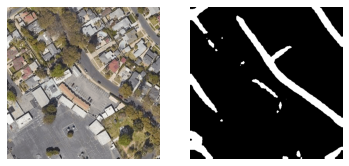

In [4]:
def plot_figures(figures, nrows = 1, ncols=2):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        #axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    #plt.tight_layout() # optional
    
#plt.imshow(img)
#plt.imshow(pred_img)
plot_figures({'img':img, 'pred':pred_img})
plt.show()


In [5]:
# pred_img.shape
# cropped_imgs = {}
# for i in range(25):
#     for j in range(25):
#         key = str(i) + ',' + str(j)
#         cropped_imgs[key] = pred_img[i*16: (i+1)*16, j*16: (j+1)*16]

# plot_figures(cropped_imgs, nrows = 25, ncols = 25)

In [6]:
# #np.unique(cropped_imgs['0,0'])
# cropped_imgs['22,0'].shape
# cropped_imgs['22,0']

In [23]:
# import cv2 as cv
# im = cv.imread(pred_path)
# imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(imgray, 127, 255, 0)
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# small_conts = []
# for cnt in contours:
#     area = cv.contourArea(cnt)
#     if(area < 200):
#         small_conts = small_conts + [cnt]

# print(len(small_conts))

2


In [8]:
# cv.drawContours(imgray, small_conts, -1, (0,255,0), 3)
# cv.imshow('Contours', imgray)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [9]:
# mask = np.ones(imgray.shape[:2], dtype="uint8") * 255
# for c in contours:
#     # if the contour is bad, draw it on the mask
#     if (cv.contourArea(c)<200):
#         cv.drawContours(mask, [c], -1, 0, -1)

# zz = cv.bitwise_and(imgray, imgray, mask=mask)
# cv.imshow("Mask", mask)
# cv.imshow("After", zz)
# cv.waitKey(0)

In [10]:
#cv.imwrite(post_path, zz) 

In [21]:
import cv2 as cv

def remove_small_conts(pred_path, post_path):
    im = cv.imread(pred_path)
    imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    mask = np.ones(imgray.shape[:2], dtype="uint8") * 255
    for c in contours:
        if(cv.contourArea(c) < 250):
            cv.drawContours(mask, [c], -1, 0, -1)

    new_pred = cv.bitwise_and(imgray, imgray, mask=mask)
    cv.imwrite(post_path, new_pred)

In [22]:
for img_name in images:
    pred_path = os.path.join(pred_dir, img_name)
    post_path = os.path.join(post_dir, img_name)
    remove_small_conts(pred_path, post_path)